In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy as sp
import pandas as pd
from pandas.io.json import json_normalize
import json
import math
import datetime
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tslearn.clustering import KShape
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
def convert_datetime(name):
    json = pd.read_json('../data/downloads/' + name + '_download.json')
    df_json = pd.DataFrame(json['downloads'])
    df = json_normalize(df_json['downloads'])
    df['day'] = pd.to_datetime(df['day'], infer_datetime_format=True)
    df.index = df['day']
    return df

def convert_week_datetime(name):
    df = convert_datetime(name)
    df_w = round(df.resample(rule="W").mean())
    return df_w

def convert_ts(name):
    df_w = convert_week_datetime(name)
    ts = sm.tsa.seasonal_decompose(df_w['downloads'].values, freq=52)
    return ts

72


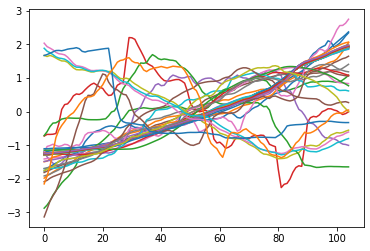

In [5]:
# assets = pd.read_json('../data/assets/over1000packages.json')
# assets = pd.read_json('../data/assets/over50_and_onder1000.json')
assets =  pd.read_json('../data/assets/iot_all.json');

print(len(assets))

for i in assets.values:
    ts = convert_ts(i[0])
    ts = ts.trend[26:131]
    d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(ts)
    plt.plot(d[0])

In [112]:
print(len(assets))
# 12 / 75 

70


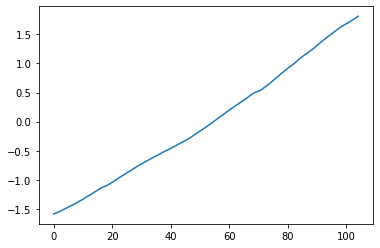

In [8]:
plt.plot(d[0])

In [7]:
assets = pd.read_json('../data/assets/over1000packages.json')

X_train 
for i, v in enumerate(assets.values):
    ts = convert_ts(v[0])
    ts = ts.trend[26:131]
    d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(ts)
    X_train = np.concatenate([X_train, d[0]])

print(X_train)

print(d.shape)

sz = d.shape[1]
seed = 0
np.random.seed(seed)
cluster_num = 3
km = TimeSeriesKMeans(n_clusters=cluster_num, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)


for i in d:
    plt.plot(i)

plt.figure()
for yi in range(cluster_num):
    plt.subplot(3, 3, yi + 1)
    for xx in d[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
        ab = np.linalg.norm(km.cluster_centers_[yi].ravel() - xx.ravel())
        print('class', yi)
#         print('ab', ab)
        if(ab > 3):
            print('limit', ab)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("クラスタ数 = 3 での k ")

plt.tight_layout()
plt.show()

NameError: name 'X_train' is not defined

In [8]:
assets = pd.read_json('../data/assets/over1000packages.json')
print(len(assets))
X_train = np.empty([104, 1])
for i, v in enumerate(assets.values):
    ts = convert_ts(v[0])
#     ts = ts.trend[26:131]
    ts = ts.trend[26:130]
    ary = np.array(ts)
    split = np.split(ary, 2)
    for i in split:
        d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(i)
        X_train = np.concatenate([X_train, d[0]])

print('x-train', X_train.shape)

# km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=0)
# y_pred = km.fit_predict(X_train)


# plt.figure()
# for yi in range(3):
#     plt.subplot(3, 3, yi + 1)
#     for xx in X_train[y_pred == yi]:
#         plt.plot(xx.ravel(), "k-", alpha=.2)
#     plt.plot(km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
#     plt.ylim(-4, 4)
#     if yi == 1:
#         plt.title("Euclidean $k$-means")

# plt.tight_layout()
# plt.show()
print(X_train)

104
x-train (10920, 1)
[[2.45698383e-314]
 [2.45698481e-314]
 [2.45845427e-314]
 ...
 [1.56352630e+000]
 [1.61753293e+000]
 [1.67572526e+000]]


210
(210, 52, 1)
2.551 --> 1.949 --> 1.904 --> 1.904 --> 1.903 --> 1.902 --> 1.902 --> 1.902 --> 


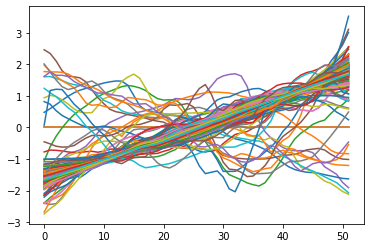

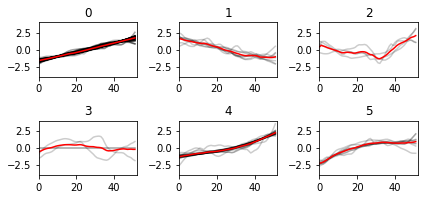

In [9]:
c = np.split(X_train, 105 * 2)
print(len(c))
# print(len(c))
# print(len(c[104]))
d = np.array(c)
print(d.shape)

sz = d.shape[1]
seed = 0
np.random.seed(seed)
cluster_num = 6
km = TimeSeriesKMeans(n_clusters=cluster_num, verbose=True, random_state=seed)
y_pred = km.fit_predict(d)


for i in d:
    plt.plot(i)

plt.figure()
for yi in range(cluster_num):
    plt.subplot(3, 3, yi + 1)
    for xx in d[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
        ab = np.linalg.norm(km.cluster_centers_[yi].ravel() - xx.ravel())
#         print('class', yi)
#         print('ab', ab)
#         if(ab > 3):
#             print('limit', ab)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title(yi)

plt.tight_layout()
plt.show()


In [16]:
# ダウンロード数のトレンドが成長期、成熟期、衰退期とかにわけらそう
# 一方、他のパラメタの要因から予測する手法を編出すの
# print(y_pred)
c = 0
for i in y_pred:
    if i == 0 or i == 2 or i ==4:
        c = c+1

print(c)

189


In [82]:
k = km.cluster_centers_[0].ravel()

In [37]:
ab = np.linalg.norm(k2-k)
print(ab)

9.978969342348956


In [38]:
# ts = convert_ts('yarn')
# ts = ts.trend[26:131]
# d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(ts)
# yarn = d[0].flatten()
# print(np.linalg.norm(k - yarn))
# print(np.linalg.norm(k2 - yarn))

ValueError: operands could not be broadcast together with shapes (35,) (105,) 

NameError: name 'k2' is not defined

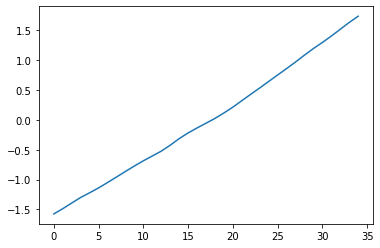

In [83]:
plt.plot(k)
plt.plot(k2)
avalue = np.linalg.norm(k-k2)
print(avalue)

In [17]:
print(yarn.flatten())

[-1.57238806 -1.53836364 -1.49986602 -1.45921876 -1.41802442 -1.37460637
 -1.33358261 -1.30019844 -1.27214657 -1.24678665 -1.222551   -1.19873295
 -1.17686339 -1.15425419 -1.12982359 -1.10483922 -1.08096145 -1.0631838
 -1.04754623 -1.02619508 -1.00262549 -0.97972817 -0.95532099 -0.92977998
 -0.9072821  -0.88359545 -0.85700327 -0.83157311 -0.804323   -0.77460551
 -0.74445369 -0.71356319 -0.68056127 -0.64577045 -0.61214978 -0.5821026
 -0.55310898 -0.52207561 -0.4910561  -0.46863897 -0.44624    -0.41409335
 -0.38183203 -0.35402671 -0.33134249 -0.31244104 -0.2932424  -0.2722778
 -0.24755001 -0.21931371 -0.19286678 -0.16563626 -0.13544574 -0.10726725
 -0.08191115 -0.05636775 -0.03137048 -0.00704071  0.01953284  0.053326
  0.0914968   0.12592067  0.16136321  0.19742116  0.23120285  0.26596213
  0.30187818  0.33821947  0.37531378  0.40444644  0.42439571  0.44955926
  0.48315556  0.52087341  0.56036533  0.59703583  0.63249127  0.66622041
  0.70261282  0.75276599  0.80874264  0.85877588  0.9046

In [ ]:
assets = pd.read_json('data/assets/over1000packages.json')

for i, v in enumerate(assets.values):
    print(v[0])
    ts = convert_ts(v[0])
    ts = ts.trend[26:131]
    d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(ts)
    pkg = d[0].flatten()




In [16]:
print(k)

[-1.49283777 -1.4599206  -1.43553526 -1.41048629 -1.38650273 -1.36304799
 -1.33997846 -1.31721066 -1.29183494 -1.26405501 -1.234513   -1.20597086
 -1.18041702 -1.15397495 -1.12776921 -1.10389011 -1.08048908 -1.06333912
 -1.05066557 -1.0314661  -1.00804651 -0.98297053 -0.95568661 -0.92830357
 -0.90287162 -0.87896379 -0.85258824 -0.82252028 -0.7877091  -0.75416743
 -0.72705308 -0.70336159 -0.67714437 -0.64534325 -0.61499754 -0.58811094
 -0.56135151 -0.53112621 -0.50292386 -0.48587099 -0.46537928 -0.43646908
 -0.40913074 -0.38249728 -0.35624645 -0.33012444 -0.30499109 -0.27935266
 -0.24732316 -0.21253605 -0.1828706  -0.15393715 -0.12211321 -0.09252632
 -0.06193811 -0.02878588  0.00389883  0.03843641  0.07536602  0.11391066
  0.15016588  0.18328591  0.21498509  0.24624267  0.27784464  0.31301262
  0.35600539  0.39882603  0.43669349  0.46428461  0.48191794  0.50850308
  0.54657576  0.58565816  0.62412884  0.66156217  0.69924316  0.7406236
  0.78313939  0.82228294  0.8593403   0.8925276   0.

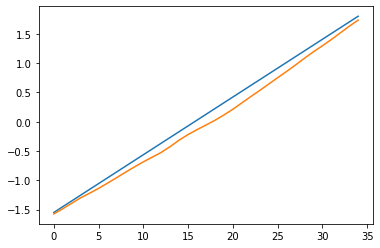

In [84]:
n = np.linspace(-1.55, 1.8, 35)
# この直線をユークリッド距離の評価に使う
# この値よりもユークリッド距離が 9 以上のものは検討しない分類に入れる
plt.plot(n)
plt.plot(k)

In [56]:
abv = np.linalg.norm(k-n)
print(abv)

0.7994459728299432


In [95]:
b = np.arange(1, 37, 1)

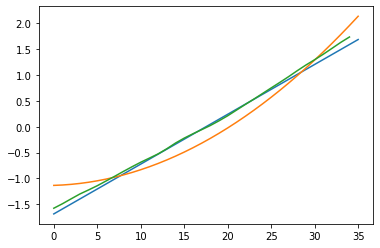

In [103]:
# x = np.linspace(0, 2*pi, 100)  #0から2πまでの範囲を100分割したnumpy配列
y =  (b ** 2)
y = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(y).flatten()
bad =  TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(b * 5).flatten()
plt.plot(bad)
plt.plot(y)
plt.plot(k)
# plt.show()

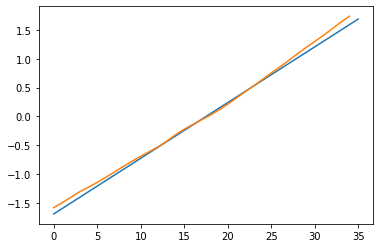

In [97]:
re = (b * 2)

d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(re).flatten()
plt.plot(d)
plt.plot(k)